# Part 1 of 4: Getting key packages and data

In [46]:
#-- get key packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

#-- get data

from sklearn.datasets import load_wine

#-- make a dataframe that contains the data

wine = load_wine()

features = wine.feature_names

df = pd.DataFrame(data=wine.data)
df.columns = features
df['wine_category'] = wine.target

print('### View head of data')
print(df.head())
print('')


### View head of data
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline

# Part 2 of 4: Exploring data

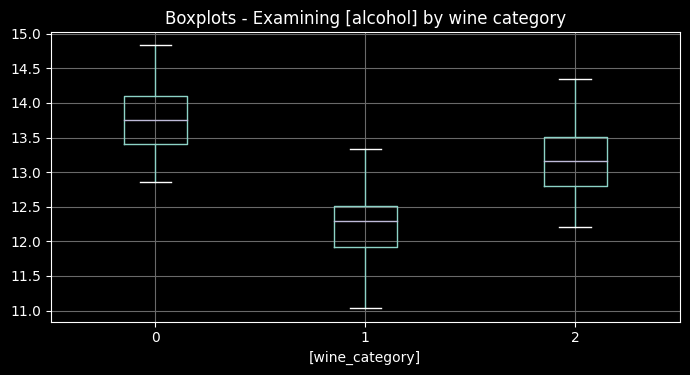

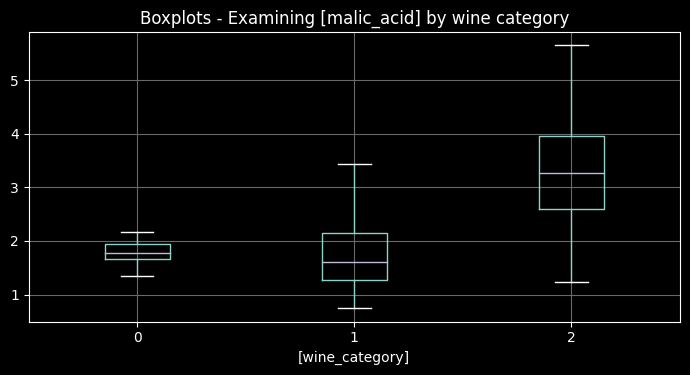

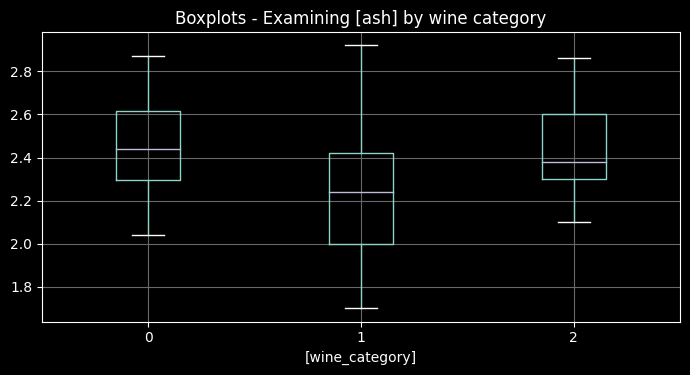

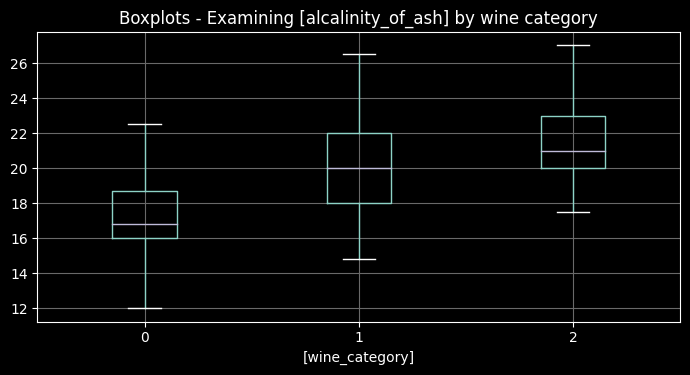

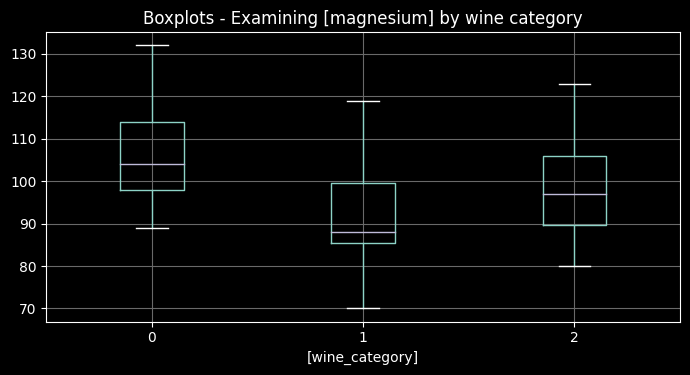

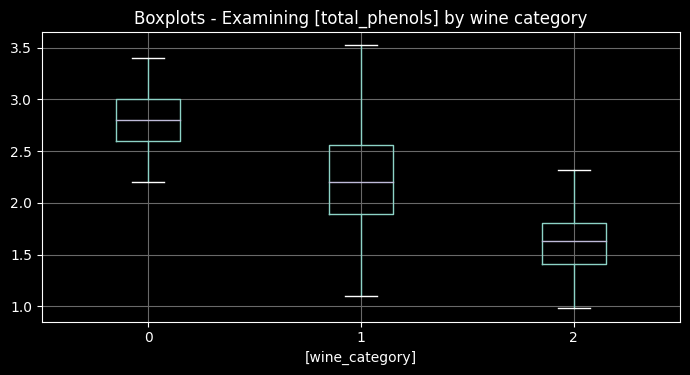

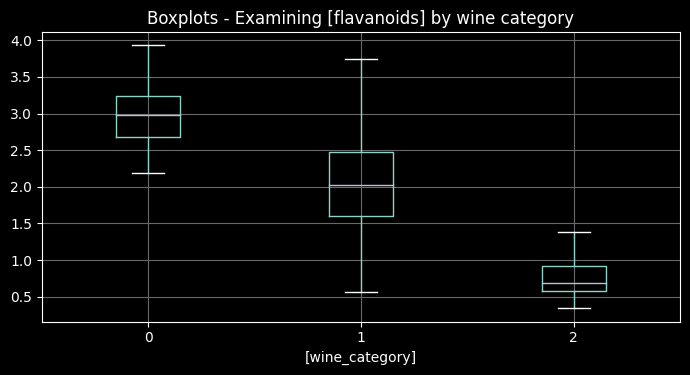

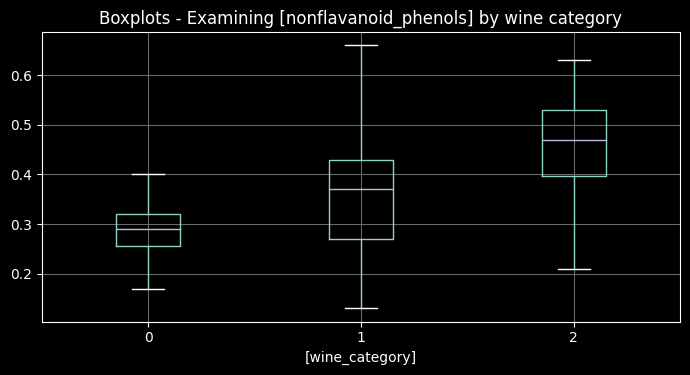

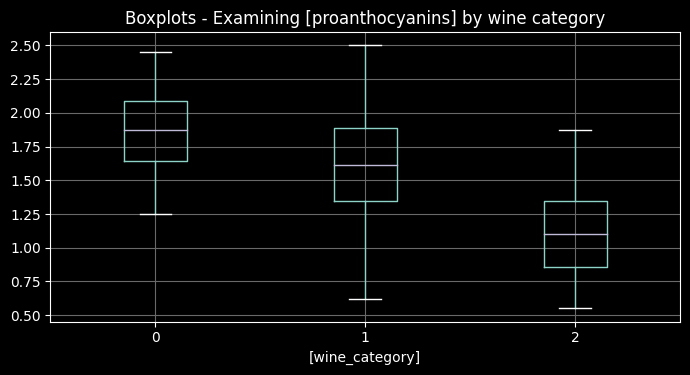

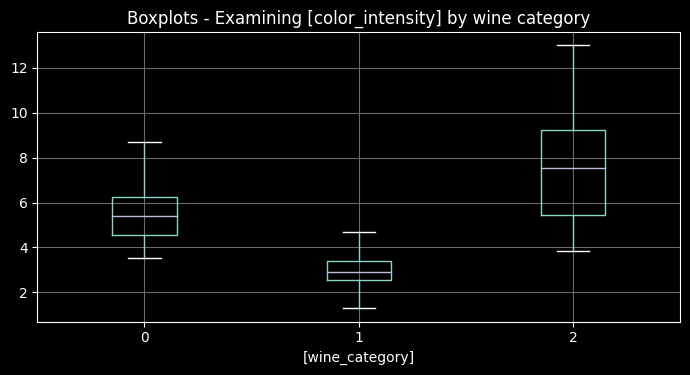

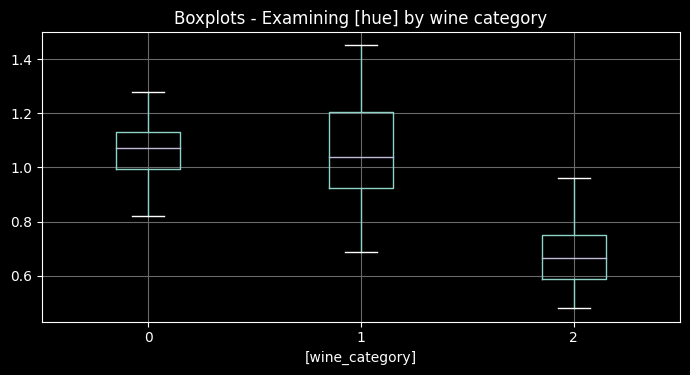

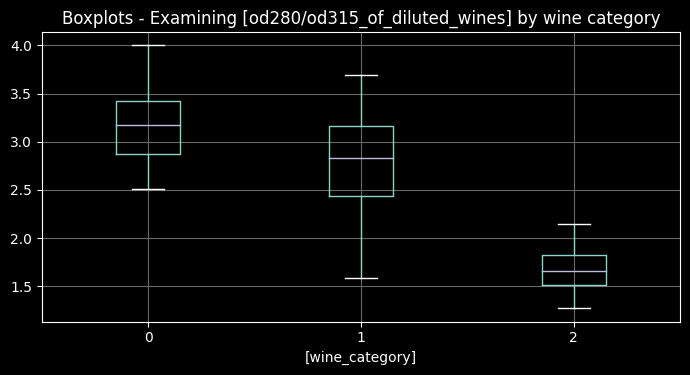

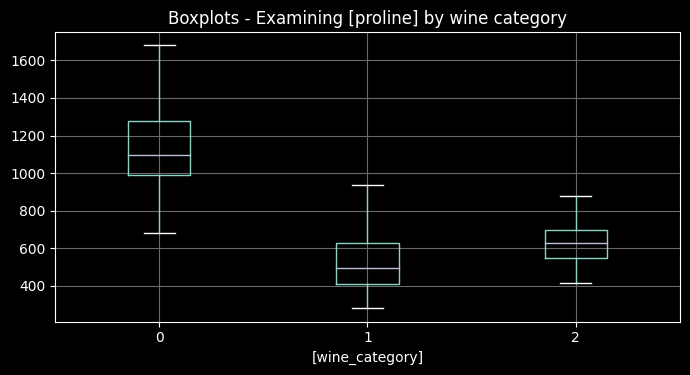

In [24]:
#-- exploring: view distribution of each feature by category of y (boxplots)

for x in features:

  from matplotlib import gridspec
  plt.style.use('dark_background')
  plt.style.context("dark_background")

  fig = plt.figure(figsize=(7, 4))
  gs = gridspec.GridSpec(1, 1, height_ratios=[1], width_ratios=[1])
  ax1 = plt.subplot(gs[0])

  plot_title = f'Boxplots - Examining [{x}] by wine category'

  df[[x,'wine_category']].boxplot(by='wine_category', ax=ax1, showfliers=False, capprops={'color': 'white'})
  ax1.set_title(plot_title)
  ax1.get_figure().suptitle("")

  ax1.grid(c='dimgray')

  plt.tight_layout()


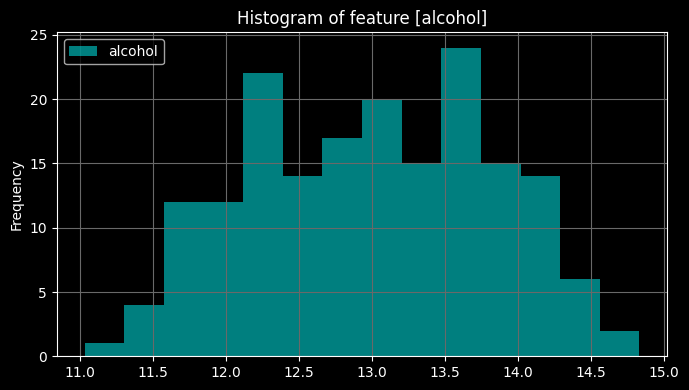

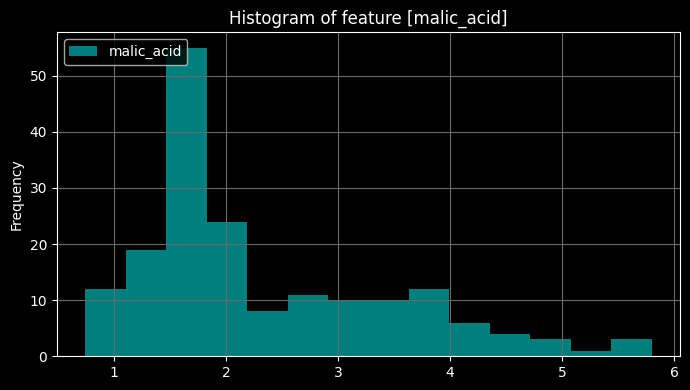

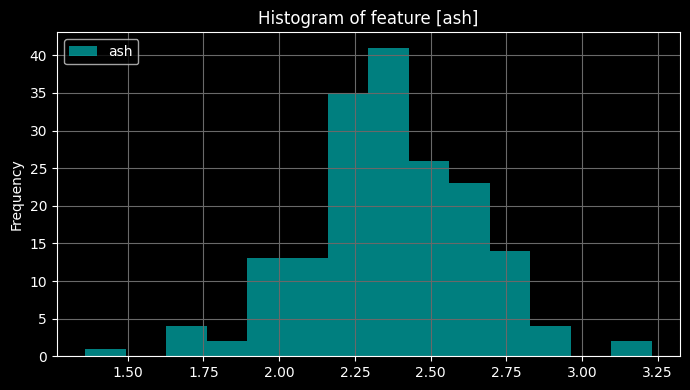

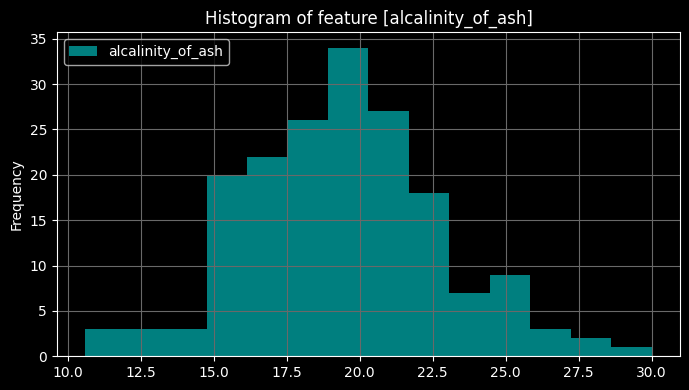

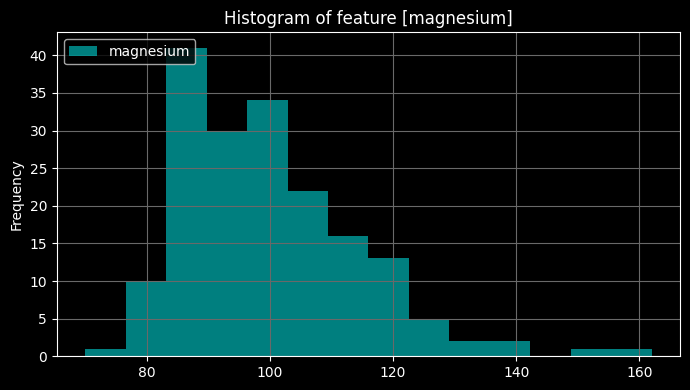

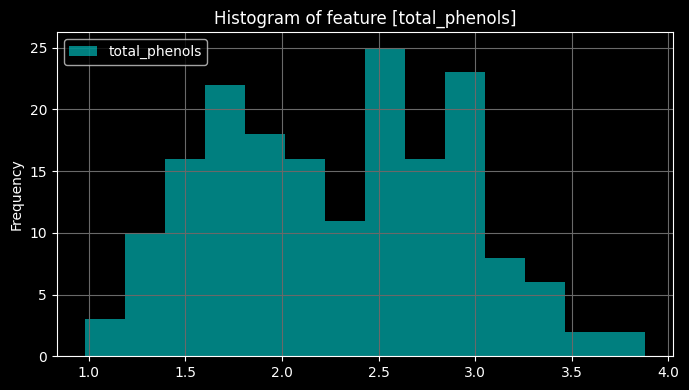

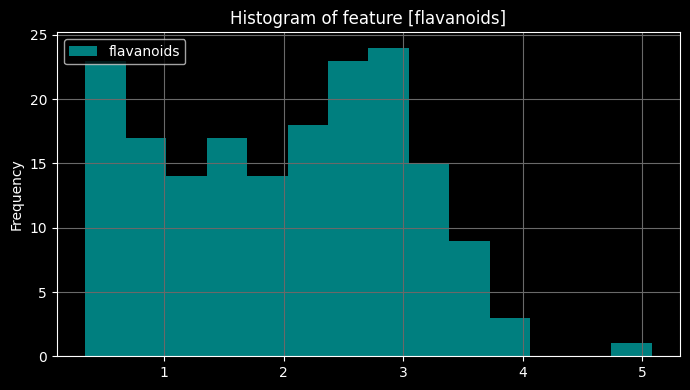

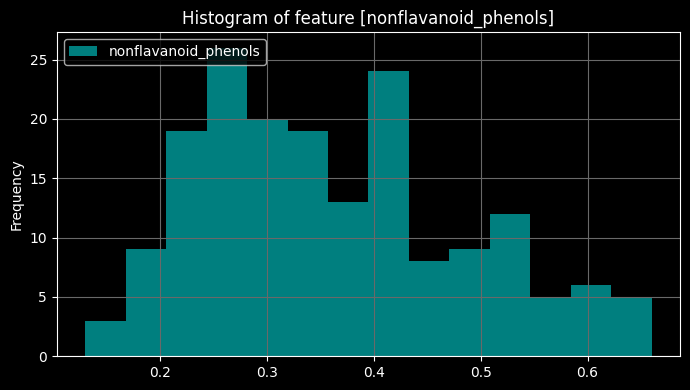

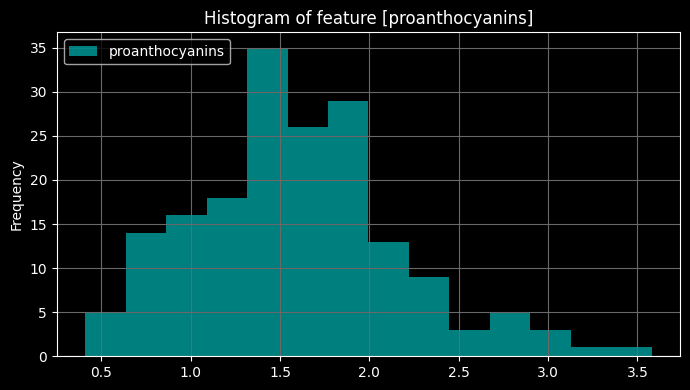

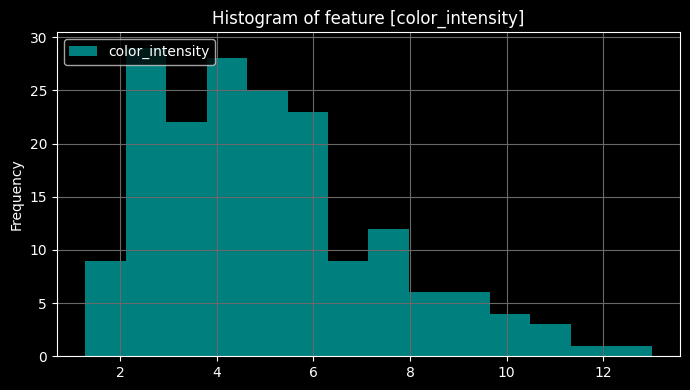

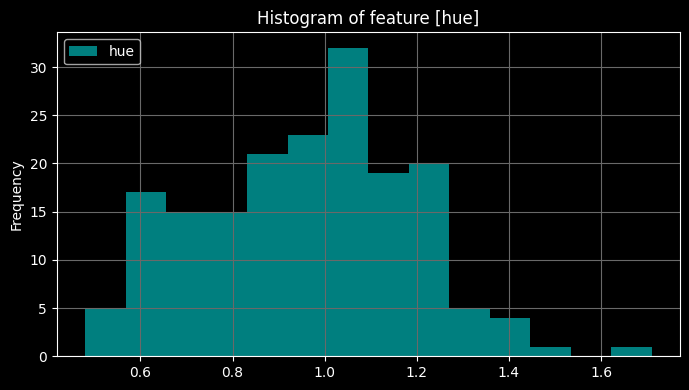

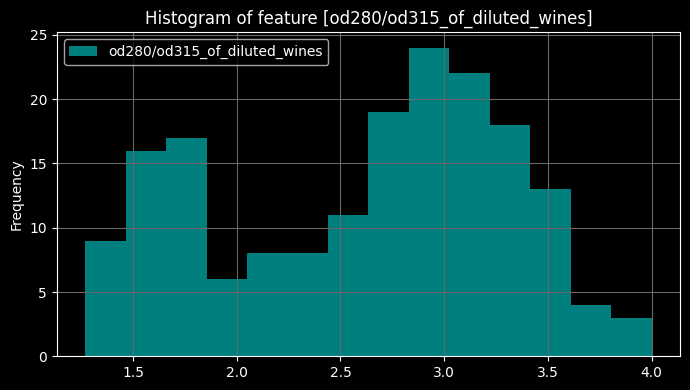

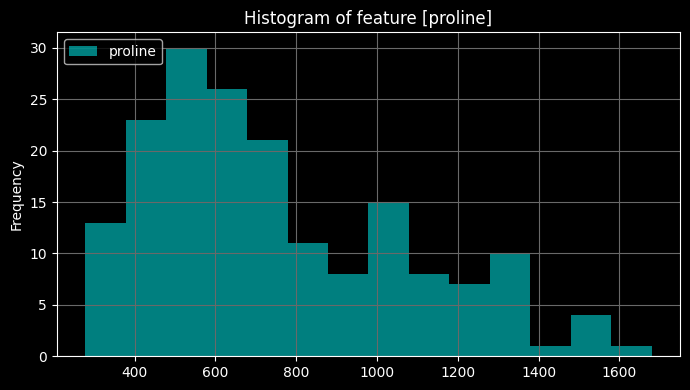

In [28]:
#-- exploring: view histogram of each potential feature

for x in features:

  from matplotlib import gridspec
  plt.style.use('dark_background')
  plt.style.context("dark_background")

  num_colors = 4
  color = plt.cm.cool(np.linspace(0, 1, num_colors))
  cyc = plt.cycler('color', color)
  plt.rc('axes', prop_cycle=cyc)

  fig = plt.figure(figsize=(7, 4))
  gs = gridspec.GridSpec(1, 1, height_ratios=[1], width_ratios=[1])
  ax1 = plt.subplot(gs[0])

  plot_title = f'Histogram of feature [{x}]'

  df[[x]].plot.hist(ax=ax1, bins=14, alpha=0.5, title=plot_title)

  ax1.grid(c='dimgray')
  ax1.yaxis.set_label_position("left")
  plt.legend(loc='upper left')

  plt.tight_layout()


# Part 3 of 4: Try a few types of SVM models

In [38]:
#-- split the data

X = df[features]
y = df['wine_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)



In [41]:
#-- try several SVM models; see how the kernel type affects accuracy

list_kernels = ['linear', 'rbf', 'poly']

for i in list_kernels:

  model = SVC(kernel=i, C=1.0)
  model.fit(X_train, y_train)
  accuracy_score = model.score(X_test, y_test)

  print(f'# Accuracy score when kernel={i}, C=1.0 - accuracy={accuracy_score:.3f}')


# Accuracy score when kernel=linear, C=1.0 - accuracy=0.981
# Accuracy score when kernel=rbf, C=1.0 - accuracy=0.722
# Accuracy score when kernel=poly, C=1.0 - accuracy=0.685


# Part 4 of 4: Use GridSearchCV to optimize model parameters

In [44]:
#-- use GridSearchCV to find best set of parameters (considering kernel and C value)

list_Cs = [0.1, 1, 10, 100, 1000]
list_kernels = ['rbf', 'poly', 'sigmoid', 'linear']
list_degrees = [1, 2, 3, 4, 5, 6]

param_grid = {
    'C': list_Cs,
    'kernel': list_kernels,
    'degree': list_degrees
    }

grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

print('### View best params')
print(grid.best_params_)


### View best params
{'C': 0.1, 'degree': 1, 'kernel': 'linear'}


In [47]:
#-- try the params obtained via GridSearchCV; assess performance

best_C = grid.best_params_['C']
best_kernel = grid.best_params_['kernel']
best_degree = grid.best_params_['degree']

model = SVC(kernel=best_kernel, C=best_C, degree=best_degree)
model.fit(X_train, y_train)

model_preds = model.predict(X_test)
model_conf_matrix = confusion_matrix(y_test, model_preds)
model_acc_score = accuracy_score(y_test, model_preds)
model_class_report = classification_report(y_test, model_preds)

print('### Assessing performance of model with the following params:')
print(f'{grid.best_params_}')
print(f'# accuracy score: {model_acc_score:.3f}')
print('# classification report')
print(model_class_report)



### Assessing performance of model with the following params:
{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
# accuracy score: 0.981
# classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54

